Lambda

In [2]:
# Regular function to double a number
def double(x):
    return x * 2

double(4)

8

In [4]:
#Lambda function
double_lambda = lambda x: x*2
double_lambda(4)

8

A lambda function is a small anonymous function.

A lambda function can take any number of arguments, but can only have one expression.

Regular funcation

In [6]:
def double(x):
    return x * 2

number = 1
for func in [double, double, double]:
    number = func(number)
    print(number)

2
4
8


In [7]:
number = 1
for func in [double, double, double]:
    number = func(number)
print(number)

8


In [8]:
def add_one(x):
    return x + 1

In [9]:
number = 1
for func in [add_one, double, add_one]:
    number = func(number)
    print(number)

2
4
5


In [10]:
number = 1
for func in [add_one, double, add_one]:
    number = func(number)
print(number)

5


Lambda

In [11]:
number = 1
for func in [lambda x: x - 1, lambda x: x * 2, lambda x: x + 2]:
    number = func(number)
    print(number)

0
0
2


In [12]:
number = 1
for func in [lambda x: x - 1, lambda x: x * 2, lambda x: x + 2]:
    number = func(number)
print(number)

2


Reduce

In [13]:
from functools import reduce

def add(x, y):
    return x + y

result = reduce(add, [1, 2, 3, 4])
print(result)

10


reduce + lambda

In [15]:
number = [1, 2, 3, 4]

reduce(lambda x, y: x + y, number)

10

In [17]:
import numpy as np
import pandas as pd

# Generates a DataFrame with 10 rows and 2 columns filled with random numbers drawn from a normal distribution with mean 0 and standard deviation 1 using NumPy's np.random.normal() function.
df = pd.DataFrame(np.random.normal(0, 1, (10, 2)))

In [19]:
df

,column_a,column_b
0,0.138643,0.645259
1,-0.612896,-0.301352
2,0.845032,1.419001
3,0.629414,-0.377755
4,-0.003163,-0.560859
5,-1.500427,-0.358697
6,0.882311,0.447261
7,-0.806033,-0.634197
8,-0.124982,-1.566359
9,0.470620,-0.909041


In [20]:
#Uses the .loc[] indexer to select rows from the DataFrame where the values in 'column_b' are greater than 0. 
df.columns = ['column_a', 'column_b']
df.loc[lambda d: d['column_b'] > 0]

,column_a,column_b
0,0.138643,0.645259
2,0.845032,1.419001
6,0.882311,0.447261


Scikit Metrics

In [17]:
#import a dataset
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import os

file_path = "../Dataset/creditcard.csv"

# Read the CSV file
df = pd.read_csv(file_path)[:80000]
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
X = df.drop(columns=['Time', 'Amount', 'Class']).values
y = df['Class'].values
f"Shapes of X={X.shape} y={y.shape}, #Fraud Cases={y.sum()}"

'Shapes of X=(80000, 28) y=(80000,), #Fraud Cases=196'

Model 1

In [20]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=1000)
mod.fit(X, y).predict(X).sum()

172

Model 2

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in range(1, 4)]},
    cv=4,
    n_jobs=-1
)
grid.fit(X, y);

print the reslut

In [22]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.263773,0.061467,0.004251,0.000830,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.8431,0.99835,0.99950,0.99785,0.959700,0.067322,1
1,0.248773,0.040701,0.004015,0.000354,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.8190,0.99840,0.99965,0.99805,0.953775,0.077815,2
2,0.227364,0.026767,0.003620,0.000954,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.7089,0.99845,0.99960,0.99815,0.926275,0.125503,3


Chart

In [35]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]},
    scoring={'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score)},
    refit='precision',
    return_train_score=True,
    cv=10,
    n_jobs=-1
)
grid.fit(X, y);

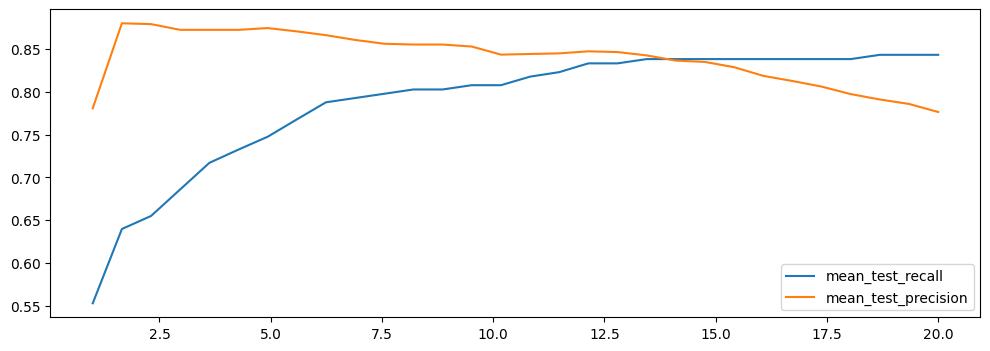

In [36]:
#test result
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot([_[1] for _ in df_results['param_class_weight']],
            df_results[score],
            label=score)
plt.legend();


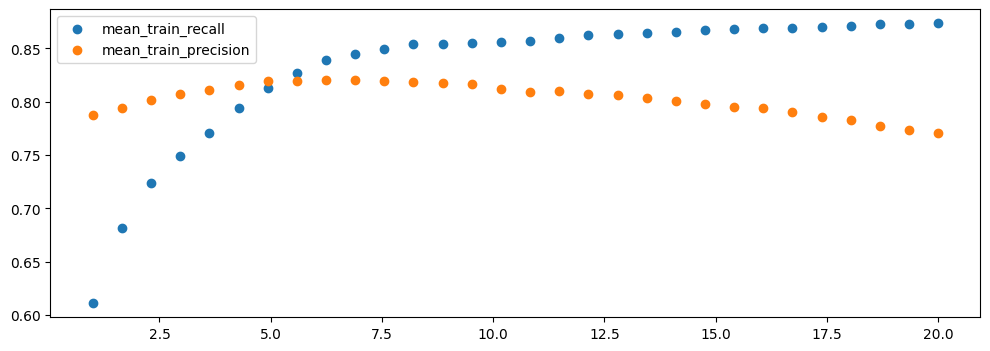

In [37]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_train_recall', 'mean_train_precision']:
    plt.scatter(x=[_[1] for _ in df_results['param_class_weight']],
                y=df_results[score.replace('test', 'train')],
                label=score)
plt.legend();

In [43]:
def min_recall_precision(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

In [48]:
from sklearn.model_selection import GridSearchCV

def min_recall_precision(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]},
    scoring={'precision': make_scorer(precision_score),
            'recall': make_scorer(recall_score),
            'min_both': make_scorer(min_recall_precision)},
    refit='min_both',
    return_train_score=True,
    cv=10,
    n_jobs=-1
)
grid.fit(X, y);

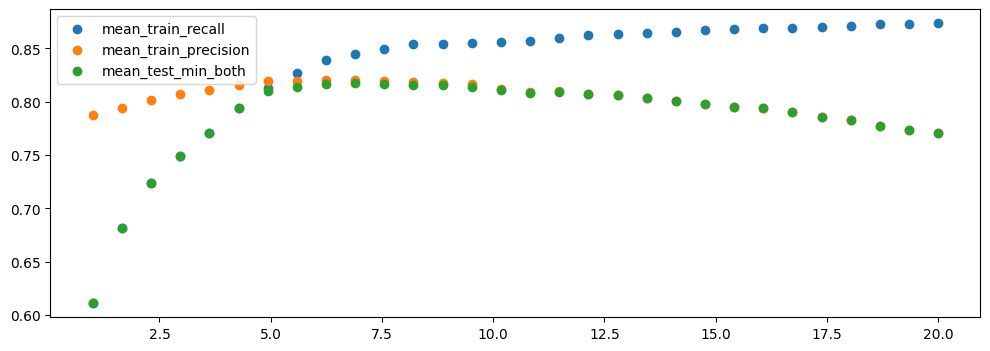

In [47]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_train_recall', 'mean_train_precision', 'mean_test_min_both']:
    plt.scatter(x=[_[1] for _ in df_results['param_class_weight']],
                y=df_results[score.replace('test', 'train')],
                label=score)
plt.legend();

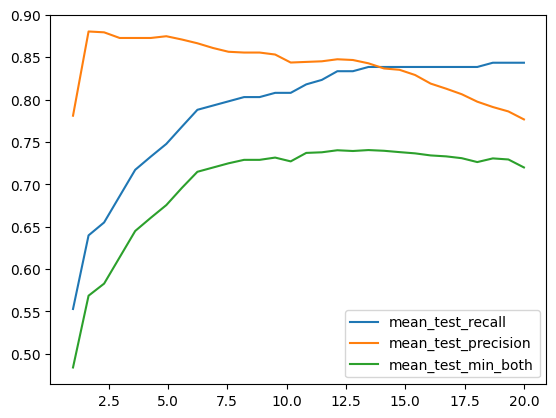

In [51]:
df = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision', 'mean_test_min_both']:
    plt.plot([_[1] for _ in df['param_class_weight']],
             df[score],
             label=score)
plt.legend();

score_setting

In [52]:
def min_recall_precision(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

?make_scorer

Signature:
make_scorer(
    score_func,
    *,
    response_method=None,
    greater_is_better=True,
    needs_proba='deprecated',
    needs_threshold='deprecated',
    **kwargs,
)
Docstring:
Make a scorer from a performance metric or loss function.

A scorer is a wrapper around an arbitrary metric or loss function that is called
with the signature `scorer(estimator, X, y_true, **kwargs)`.

It is accepted in all scikit-learn estimators or functions allowing a `scoring`
parameter.

The parameter `response_method` allows to specify which method of the estimator
should be used to feed the scoring/loss function.

Read more in the :ref:`User Guide <scoring>`.

Parameters
----------
score_func : callable
    Score function (or loss function) with signature
    ``score_func(y, y_pred, **kwargs)``.

response_method : {"predict_proba", "decision_function", "predict"} or             list/tuple of such str, default=None

    Specifies the response method to use get prediction from an estimator
  

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

def min_recall_precision(est, X, y_true, sample_weight=None):
    y_pred = est.predict(X)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]},
    scoring={'precision': make_scorer(precision_score),
            'recall': make_scorer(recall_score),
            'min_both': min_recall_precision},
    refit='min_both',
    return_train_score=True,
    cv=10,
    n_jobs=-1
)
grid.fit(X, y);

In [55]:
from collections import Counter
from sklearn.ensemble import IsolationForest
mod = IsolationForest().fit(X)
np.where(mod.predict(X) == -1, 1, 0)

array([0, 0, 0, ..., 0, 0, 0])

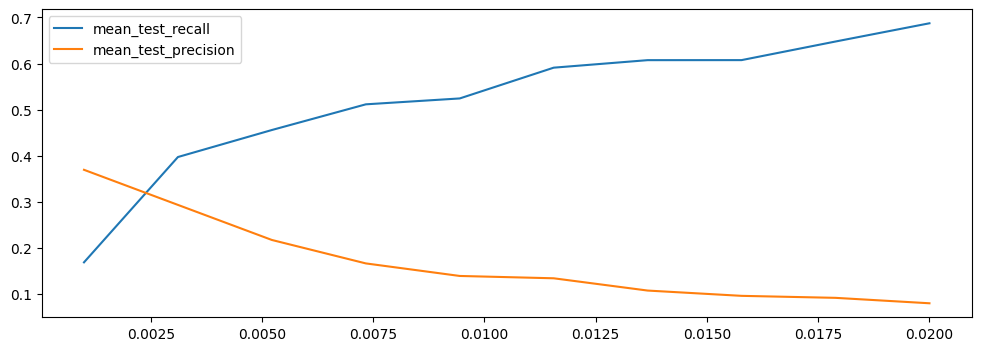

In [56]:
def outlier_precision(mod, X, y):
    preds = mod.predict(X)
    return precision_score(y, np.where(preds == -1, 1, 0))

def outlier_recall(mod, X, y):
    preds = mod.predict(X)
    return recall_score(y, np.where(preds == -1, 1, 0))

grid = GridSearchCV(
    estimator=IsolationForest(),
    param_grid={'contamination': np.linspace(0.001, 0.02, 10)},
    scoring={'precision': outlier_precision,
            'recall': outlier_recall},
    refit='precision',
    cv=5,
    n_jobs=-1
)
grid.fit(X, y);

plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot(df_results['param_contamination'],
            df_results[score],
            label=score)
plt.legend();